In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data = pd.read_csv('titanic-passengers.csv', sep=';')

# Preprocessing
# Handle missing data (e.g., impute missing ages)
data['Age'].fillna(data['Age'].median(), inplace=True)

# Encode categorical variables (Sex, Embarked)
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['Embarked'] = label_encoder.fit_transform(data['Embarked'].astype(str))

# Create dummy variables for categorical variables (if needed)
# data = pd.get_dummies(data, columns=['Pclass', 'Embarked'])

# Split the data into train and test sets
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can improve model performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the Decision Tree model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)
classification_rep_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Classifier Performance:")
print(f'Accuracy: {accuracy_dt}')
print(f'Confusion Matrix:\n{confusion_dt}')
print(f'Classification Report:\n{classification_rep_dt}')


Decision Tree Classifier Performance:
Accuracy: 0.7486033519553073
Confusion Matrix:
[[90 24]
 [21 44]]
Classification Report:
              precision    recall  f1-score   support

          No       0.81      0.79      0.80       114
         Yes       0.65      0.68      0.66        65

    accuracy                           0.75       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



In [3]:
# Create a Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = random_forest.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Classifier Performance:")
print(f'Accuracy: {accuracy_rf}')
print(f'Confusion Matrix:\n{confusion_rf}')
print(f'Classification Report:\n{classification_rep_rf}')


Random Forest Classifier Performance:
Accuracy: 0.8100558659217877
Confusion Matrix:
[[100  14]
 [ 20  45]]
Classification Report:
              precision    recall  f1-score   support

          No       0.83      0.88      0.85       114
         Yes       0.76      0.69      0.73        65

    accuracy                           0.81       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



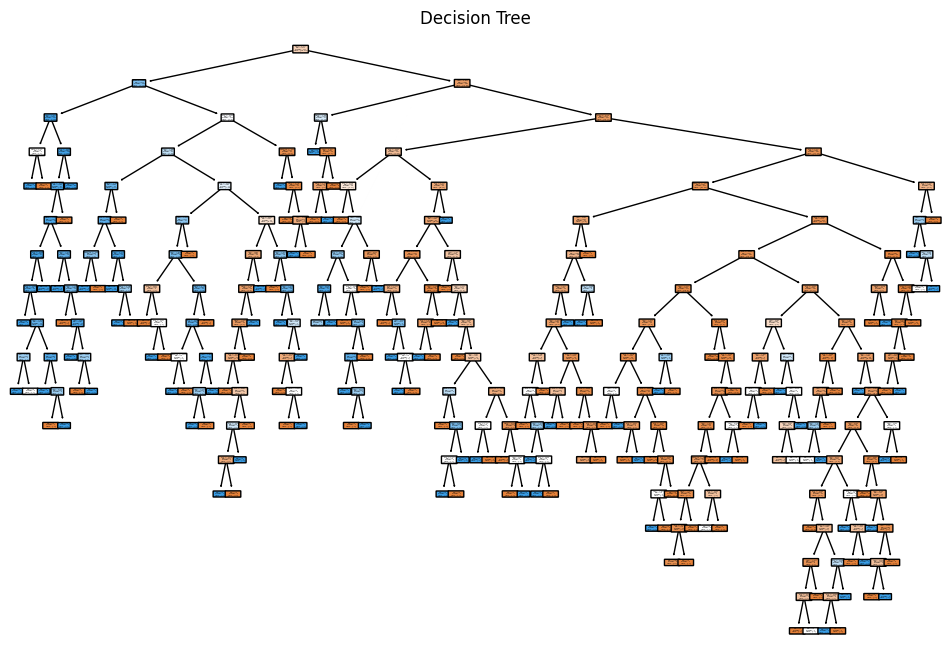

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a Decision Tree Classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()


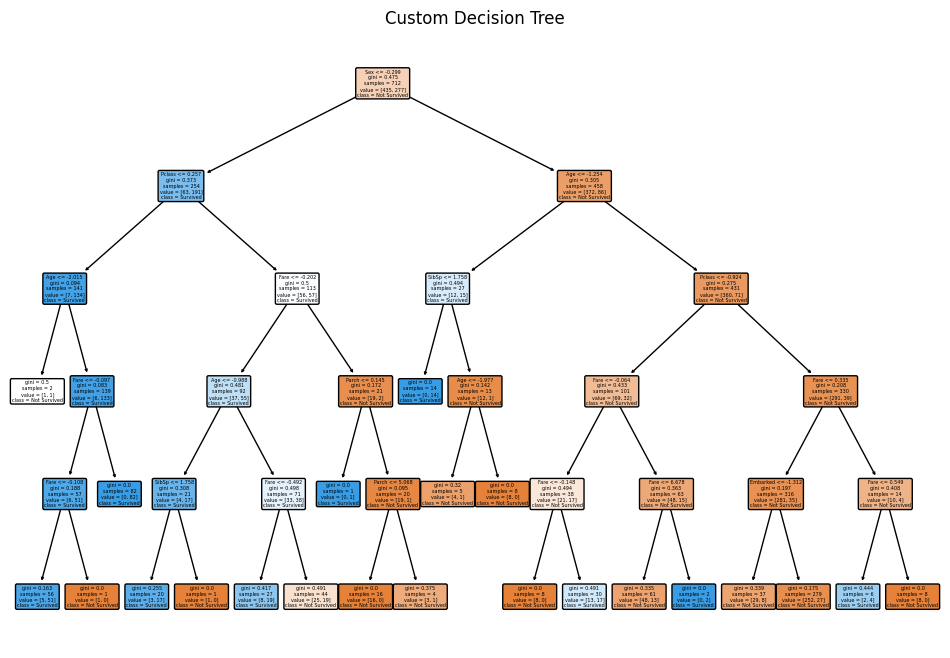

In [7]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Create a Decision Tree Classifier with custom parameters
custom_decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

# Train the model on the training data
custom_decision_tree.fit(X_train, y_train)
# Make predictions on the test data
y_pred_custom_dt = custom_decision_tree.predict(X_test)

# Plot the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(custom_decision_tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Custom Decision Tree")
plt.show()


In [8]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the decision tree with custom parameters
accuracy_custom_dt = accuracy_score(y_test, y_pred_custom_dt)

# Print the accuracy for both models
print("Accuracy for Default Decision Tree:", accuracy_dt)
print("Accuracy for Custom Decision Tree:", accuracy_custom_dt)


Accuracy for Default Decision Tree: 0.7486033519553073
Accuracy for Custom Decision Tree: 0.8100558659217877


In [9]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100
random_forest = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

accuracy_rf_custom = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy for Random Forest (n_estimators={n_estimators}): {accuracy_rf_custom}")


Accuracy for Random Forest (n_estimators=100): 0.8100558659217877


In [10]:
from sklearn.metrics import accuracy_score

# Calculate accuracy for the Random Forest model with custom number of estimators
accuracy_rf_custom = accuracy_score(y_test, y_pred_rf)

# Print the accuracy for all three models
print("Accuracy for Default Decision Tree:", accuracy_dt)
print("Accuracy for Custom Decision Tree:", accuracy_custom_dt)
print(f"Accuracy for Random Forest (n_estimators={n_estimators}): {accuracy_rf_custom}")


Accuracy for Default Decision Tree: 0.7486033519553073
Accuracy for Custom Decision Tree: 0.8100558659217877
Accuracy for Random Forest (n_estimators=100): 0.8100558659217877
